<h1>Random Forest</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.ensemble import RandomForestClassifier

In [2]:
warnings.filterwarnings('ignore')

def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [10,8]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)

plt = setup_matplot()

In [3]:
path = 'database/diabetes.csv'

df = pd.read_csv(f'{path}')

In [1]:
X = df.drop('Outcome', axis=1)

y = df['Outcome']

NameError: name 'df' is not defined

In [5]:
features_names = list(X.columns)
features_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [7]:
rf = RandomForestClassifier(random_state=2211)

rf.fit(X, y)

RandomForestClassifier(random_state=2211)

In [8]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=features_names)

In [13]:
rf_df = pd.DataFrame(forest_importances).reset_index().rename(columns={'index':'Feature', 0:'Importancy'})

rf_df.sort_values(by='Importancy', ascending=False, inplace=True)

rf_df

,Feature,Importancy
1,Glucose,0.257380
5,BMI,0.173329
7,Age,0.137121
6,DiabetesPedigreeFunction,0.122598
2,BloodPressure,0.089039
0,Pregnancies,0.083053
3,SkinThickness,0.069695
4,Insulin,0.067785


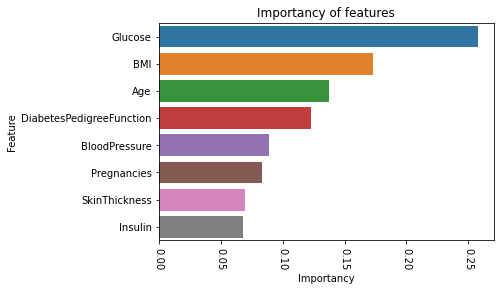

In [14]:
sns.barplot(data=rf_df, y='Feature', x='Importancy')
plt.title('Importancy of features')
plt.xticks(rotation=270)
plt.show()